# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$
- (x는 여러개로 이루어져 있으니 x1,x2,x3에 각각
                               w1,w2,w3를 곱해서 다 더해서 y값이 무엇일지 추측해서 b값을 구한다.)

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [1]:
# 데이터셋 로드 및 분리
from dataset import get_boston_dataset
X_train, X_test, y_train, y_test = get_boston_dataset()

In [2]:
X_train # 12가지 속성을 가지고 집값을 예측 할 것이다. 
# LinearRegression은 12개를 다 더해서 y를 구할 것이다. 이때 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [ ]:
# 집값이 얼마인지 보려고 했던 것이므로 하면안됨.
#X_train["집값"] = y_train
# X_train

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 객체 생성
X_train_scaled = scaler.fit_transform(X_train) # train set으로 학습 + 변환
X_test_scaled = scaler.transform(X_test) # Test set: train set으로 학습한 scaler이용해 변환.

In [6]:
from sklearn.linear_model import LinearRegression # 선형회귀모델
lr = LinearRegression() # 객체생성 # 애는 하이퍼파라미터(넘겨주는 값)이 따로 존재하지 않다.
lr.fit(X_train_scaled, y_train) # 학습

LinearRegression()

In [7]:
X_train.shape

(379, 13)

In [5]:
# weight조회: 각 feature들에 곱할 가중치들을 조회할 수 있다.
# Feature가 13개 이므로 각각의 Feature에 얼마의 가중치를 곱했는지 알 수 있다.
lr.coef_
# 음수가 나왔다 => 집값을 떨어뜨리는 feature이다. # 양수가 나왔다 => 집값을 올리는 feature이다.

array([-0.97100092,  1.04667838, -0.04044753,  0.59408776, -1.80876877,
        2.60991991, -0.19823317, -3.00216551,  2.08021582, -1.93289037,
       -2.15743759,  0.75199122, -3.59027047])

In [8]:
# bias조회: 모든 값이 0일때 출력값
lr.intercept_

22.608707124010557

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

In [13]:
X_train_scaled[0].reshape(1,-1)

array([[-0.3906002 ,  0.42637011, -0.74491444, -0.265747  , -1.07873298,
        -1.02196078,  0.05196998,  1.99457086, -0.27832777, -0.42799376,
         0.27878885,  0.34049624,  0.82212111]])

In [12]:
# 첫번째 feature에 대한 선형회귀 추정결과 모델을 이용해 추론
pred_1 = lr.predict(X_train_scaled[0].reshape(1, -1))
pred_1

array([13.54334096])

In [14]:
# 첫번째 feature에 대한 선형회귀 추정결과 직접 계산 - 이건 내부적으로 이렇게 뽑아낸다는 것을 보여주는 것으로 테스트한것이고 우리가 한다는 것이아님.
X_train_scaled[0] @ lr.coef_ + lr.intercept_ # numpy의 내적 연산은
# 1차원배열 @ 1차원 배열은 가중합을 구해줘서 같은 index의 원소끼리 곱한 결과를 모두 더한다.

13.543340962285864

In [15]:
# Train dataset에 대한 선형회귀 추정결과 직접 계산
pred_train = X_train_scaled @ lr.coef_.reshape(-1, 1) + lr.intercept_
pred_train.shape

(379, 1)

In [16]:
# Train dataset에 대한 선형회귀 추정결과 모델을 이용해 추론
pred_train2 = lr.predict(X_train_scaled)
pred_train2.shape

(379,)

In [17]:
pred_train2[:10]

array([13.54334096, 21.03611757, 35.25707372, 19.31180705, 12.9193462 ,
       13.83454251, 22.66868871, 14.2409856 , 31.24023391, 25.2746277 ])

In [18]:
(pred_train == pred_train2).sum()

379

##### 평가

In [19]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

In [20]:
from metrics import print_metrics_regression
print_metrics_regression(y_train, pred_train, "train set")

========train set========
MSE: 19.640519427908043
RMSE: 4.431762564477935
MAE: 3.1039668582990716
R2: 0.7697699488741149


In [21]:
pred_test = lr.predict(X_test_scaled)
print_metrics_regression(y_test, pred_test, "test set")

========test set========
MSE: 29.782245092302325
RMSE: 5.457311159564051
MAE: 3.668330148135714
R2: 0.6354638433202133


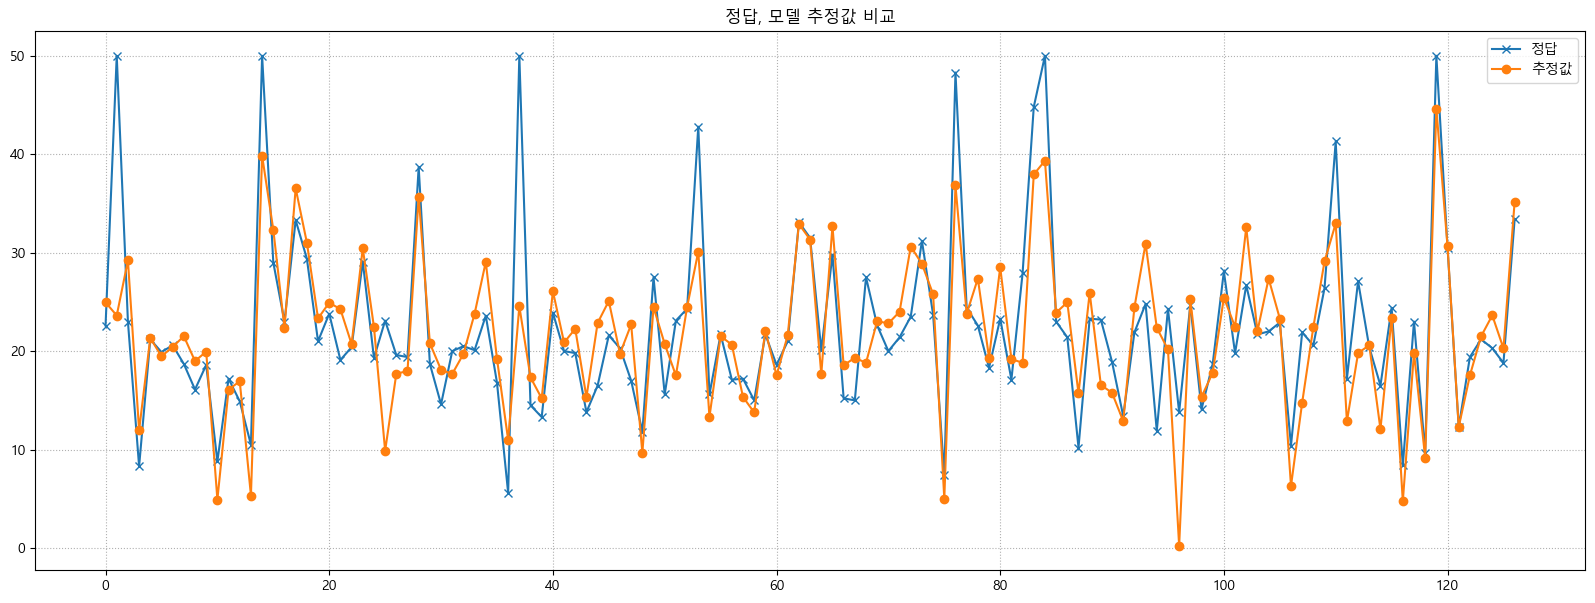

In [22]:
# 정답,모델 추정값간의 차이를 비교
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
x = range(len(y_test))
plt.plot(x, y_test, marker='x', label="정답")
plt.plot(x, pred_test, marker='o', label="추정값")
plt.legend()
plt.grid(True, linestyle=':')
plt.title("정답, 모델 추정값 비교")
plt.show()


## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져(0에 가깝게된다.) 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

In [23]:
from sklearn.linear_model import Ridge, Lasso

In [25]:
alpha = 1
ridge = Ridge(alpha=alpha, random_state=0) # alpha: 규제강도이다. default값은 1이다.
ridge.fit(X_train_scaled, y_train)

print_metrics_regression(y_train, ridge.predict(X_train_scaled))
print("=========================")
print_metrics_regression(y_test, ridge.predict(X_test_scaled))

MSE: 19.641949353818955
RMSE: 4.431923888540839
MAE: 3.10088640558938
R2: 0.76975318699993
MSE: 29.853763334547597
RMSE: 5.46385974696895
MAE: 3.668505725827107
R2: 0.6345884564889055


In [27]:
# weight 조회
ridge.coef_

array([-0.96187481,  1.02775462, -0.06861144,  0.59814087, -1.77318401,
        2.6205672 , -0.20466821, -2.96504904,  2.00091047, -1.85840697,
       -2.14955893,  0.75175979, -3.57350065])

In [28]:
# baias 조회
ridge.intercept_

22.608707124010557

In [30]:
import pandas as pd
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha 의 변화에 따른 weight의 변화를 저장할 DataFrame
coef_df = pd.DataFrame() # weight (coef) 저장
bias_list = [] # baias (intercept_) 저장

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_scaled, y_train)
    
    # weight와 bias 저장
    coef_df[f"alpha: {alpha}"] = ridge.coef_
    bias_list.append(ridge.intercept_)
    
    print(f"-------------{alpha}---------------")
#     print_metrics_regression(y_train, ridge.predict(X_train_scaled), "train")
    print_metrics_regression(y_test, ridge.predict(X_test_scaled), "test")

-------------0.001---------------
========test========
MSE: 29.78231701652623
RMSE: 5.457317749272643
MAE: 3.66833043911832
R2: 0.6354629629641464
-------------0.01---------------
========test========
MSE: 29.782964300126405
RMSE: 5.457377053138844
MAE: 3.668333047035367
R2: 0.6354550401807848
-------------0.1---------------
========test========
MSE: 29.78943370556662
RMSE: 5.457969742089692
MAE: 3.6683580500031425
R2: 0.6353758543374117
-------------1---------------
========test========
MSE: 29.853763334547597
RMSE: 5.46385974696895
MAE: 3.668505725827107
R2: 0.6345884564889055
-------------10---------------
========test========
MSE: 30.45190337374191
RMSE: 5.51832432661781
MAE: 3.665574343980472
R2: 0.6272671927504458
-------------100---------------
========test========
MSE: 34.00022384210579
RMSE: 5.830971089115928
MAE: 3.7563076564084814
R2: 0.5838355742745133
-------------500---------------
========test========
MSE: 41.739849400036874
RMSE: 6.4606384669037835
MAE: 4.25980941604893

In [31]:
bias_list # 변하지 않음

[22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557]

In [32]:
coef_df

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100,alpha: 500,alpha: 1000
0,-0.970992,-0.970907,-0.970063,-0.961875,-0.898519,-0.702647,-0.534735,-0.442678
1,1.046659,1.046484,1.044735,1.027755,0.895907,0.542402,0.432019,0.382202
2,-0.040477,-0.040742,-0.043379,-0.068611,-0.241628,-0.539236,-0.571494,-0.512882
3,0.594092,0.594130,0.594509,0.598141,0.623200,0.643067,0.469501,0.333552
4,-1.808732,-1.808405,-1.805134,-1.773184,-1.512895,-0.685798,-0.406040,-0.371299
5,2.609931,2.610030,2.611019,2.620567,2.689748,2.650139,1.776278,1.253866
6,-0.198240,-0.198300,-0.198901,-0.204668,-0.245227,-0.308313,-0.332627,-0.327295
7,-3.002128,-3.001789,-2.998407,-2.965049,-2.671723,-1.379397,-0.332010,-0.062878
8,2.080133,2.079392,2.072006,2.000910,1.486602,0.301828,-0.209340,-0.283024
9,-1.932813,-1.932113,-1.925143,-1.858407,-1.398256,-0.630364,-0.526917,-0.477386


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [33]:
alpha_list2 = [0.001, 0.01, 0.1, 1, 5, 10]

coef_df2 = pd.DataFrame()
bias_list2 = []

for alpha in alpha_list2:
    
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_scaled, y_train)
    
    coef_df2[f'alpha: {alpha}'] = lasso.coef_
    bias_list2.append(lasso.intercept_)
    
    print(f"alphaL {alpha}-----------------------")
#     print_metrics_regression(y_train, lasso.predict(X_train_scaled), "train")
    print_metrics_regression(y_test, lasso.predict(X_test_scaled), "test")

alphaL 0.001-----------------------
========test========
MSE: 29.791255130183576
RMSE: 5.45813659871055
MAE: 3.6681969731021136
R2: 0.635353560009785
alphaL 0.01-----------------------
========test========
MSE: 29.87683157624681
RMSE: 5.465970323396095
MAE: 3.666910669625587
R2: 0.6343061000666703
alphaL 0.1-----------------------
========test========
MSE: 31.173724839373957
RMSE: 5.583343517944598
MAE: 3.6801556847251127
R2: 0.6184320622196556
alphaL 1-----------------------
========test========
MSE: 35.489636168280335
RMSE: 5.957317866983458
MAE: 3.9285318553756814
R2: 0.5656050935497575
alphaL 5-----------------------
========test========
MSE: 59.87237303347597
RMSE: 7.737724021537339
MAE: 5.253141701893195
R2: 0.2671591853038978
alphaL 10-----------------------
========test========
MSE: 81.7904659829155
RMSE: 9.043808157126925
MAE: 6.262755282238796
R2: -0.001119359203955339


In [34]:
bias_list2

[22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557]

In [35]:
coef_df2

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 5,alpha: 10
0,-0.967848,-0.939492,-0.659315,-0.000000,-0.000000,-0.0
1,1.043088,1.010377,0.684820,0.000000,0.000000,0.0
2,-0.042280,-0.057475,-0.207389,-0.000000,-0.000000,-0.0
3,0.593919,0.592324,0.575874,0.000000,0.000000,0.0
4,-1.804056,-1.761604,-1.345790,-0.000000,-0.000000,-0.0
5,2.611194,2.622904,2.738958,2.529330,0.374985,0.0
6,-0.196298,-0.179110,-0.007398,-0.000000,-0.000000,-0.0
7,-2.994364,-2.923287,-2.216914,-0.000000,0.000000,0.0
8,2.065494,1.933983,0.632402,-0.000000,-0.000000,-0.0
9,-1.920598,-1.811185,-0.724794,-0.227631,-0.000000,-0.0


In [36]:
# alpha = 10 ===> 모든 weight들이 0 ===> bias(intercept_)로 추론.
# 즉 너무 규제를 강하게 하면 weight를 0으로 만들어 버리게 된다.
# bias가 동일한 것을확인할 수 있다.
# 그래서 이것은 feature가 많을 때 사용하는 것이 좋다.
lasso.predict(X_train_scaled)

array([22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 